In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.utils import plot_model

# Custom Loss Function

In [ ]:
# inputs
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
def my_rmse(y_true, y_pred):
    error = y_true - y_pred 
    sqr_error = K.square(error)
    mean_sqr_error = K.mean(sqr_error) 
    sqrt_mean_sqr_error = K.sqrt(mean_sqr_error) 
    return sqrt_mean_sqr_error

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss=my_rmse)              
model.fit(xs, ys, epochs=500,verbose=0)
print(model.predict([10.0]))

[[19.024778]]


# Custom Layer

In [ ]:
class SimpleQuadratic(Layer):

    def __init__(self, units=32, activation=None):
        '''Initializes the class and sets up the internal variables'''
        super(SimpleQuadratic, self).__init__() 
        self.units = units 
        self.activation = tf.keras.activations.get(activation) 
    
    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        # a and b should be initialized with random normal, c (or the bias) with zeros.
        a_init = tf.random_normal_initializer() 
        self.a = tf.Variable(name = 'a', initial_value = a_init(shape = (input_shape[-1], self.units), dtype = 'float32'), trainable = True) 
        
        b_init = tf.random_normal_initializer() 
        self.b = tf.Variable(name = 'b', initial_value = b_init(shape = (input_shape[-1], self.units), dtype = 'float32'), trainable = True) 
        
        c_init = tf.zeros_initializer()  
        self.c = tf.Variable(name = 'bias', initial_value = c_init(shape = (self.units,), dtype = 'float32'),trainable = True)

    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        return self.activation(tf.matmul(tf.math.square(inputs), self.a) +  tf.matmul(inputs, self.b) + self.c)

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  SimpleQuadratic(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4279 - accuracy: 0.8708
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1421 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0970 - accuracy: 0.9704
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0806 - accuracy: 0.9746
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0800 - accuracy: 0.9737


[0.08002185821533203, 0.9736999869346619]

## Model Class

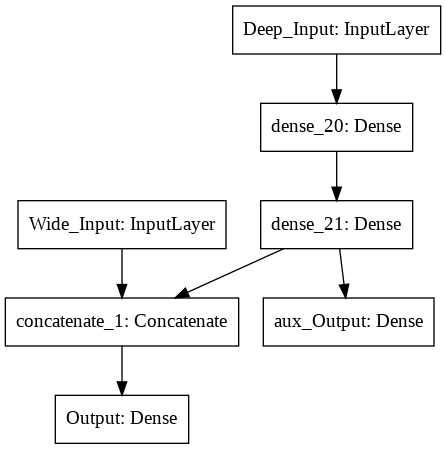

In [ ]:
input_a = tf.keras.layers.Input(shape=[1], name="Wide_Input")
input_b = tf.keras.layers.Input(shape=[1], name="Deep_Input")
hidden_1 = tf.keras.layers.Dense(30, activation="relu")(input_b)
hidden_2 = tf.keras.layers.Dense(30, activation="relu")(hidden_1)
concat = tf.keras.layers.concatenate([input_a, hidden_2])
output = tf.keras.layers.Dense(1, name="Output")(concat)
aux_output = tf.keras.layers.Dense(1,name="aux_Output")(hidden_2)
model = Model(inputs=[input_a, input_b], outputs=[output, aux_output])
plot_model(model)

In [ ]:
# inherit from the Model base class
class WideAndDeepModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        '''initializes the instance attributes'''
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        '''defines the network architecture'''
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

In [ ]:
model = WideAndDeepModel()